How is each TED Talk related to every other TED Talk?
<br>
Which are the most viewed and most favorited Talks of all time? Are they mostly the same? What does this tell us?
<br>
What kind of topics attract the maximum discussion and debate (in the form of comments)?
<br>
Which months are most popular among TED and TEDx chapters?
<br>
Which themes are most popular amongst TEDsters?

In [990]:
%matplotlib inline

In [991]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [992]:
main_data = pd.read_csv('dataset/ted_main.csv')
trans_data = pd.read_csv('dataset/transcripts.csv')

In [993]:
md = main_data.copy()
td = trans_data.copy()

In [994]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Columns: 253 entries, transcript to Unnamed: 252
dtypes: object(253)
memory usage: 4.8+ MB


In [995]:
td.head(3)

,transcript,url,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [996]:
use_full_columns = ["transcript","url"]

In [997]:
#Selecting usefull columns decreased memory usage.
#It was: 4.8 MB
#Now: 38.7 KB
td = td[use_full_columns]

In [998]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  2471 non-null   object
 1   url         2467 non-null   object
dtypes: object(2)
memory usage: 38.7+ KB


In [999]:
td.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [1000]:
md.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [1001]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [1002]:
#change types
md['comments'] = md['comments'].astype('int32')
md['description'] = md['description'].str.lower().str.strip()
md['duration'] = md['duration'].astype('int32')
md['event'] = md['event'].astype('category').str.lower().str.strip()
md['film_date'] = pd.to_datetime(md['film_date'], unit='s')
md['languages'] = md['languages'].astype('int32')
md['main_speaker'] = md['main_speaker'].str.lower().str.strip()
md['name'] = md['name'].str.lower().str.strip()
md['num_speaker'] = md['num_speaker'].astype('int32')
md['published_date'] = pd.to_datetime(md['published_date'], unit='s')
md['speaker_occupation'] = md['speaker_occupation'].astype('category').str.lower().str.strip()
md['title'] = md['title'].str.lower().str.strip()

In [1003]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   comments            2550 non-null   int32         
 1   description         2550 non-null   object        
 2   duration            2550 non-null   int32         
 3   event               2550 non-null   object        
 4   film_date           2550 non-null   datetime64[ns]
 5   languages           2550 non-null   int32         
 6   main_speaker        2550 non-null   object        
 7   name                2550 non-null   object        
 8   num_speaker         2550 non-null   int32         
 9   published_date      2550 non-null   datetime64[ns]
 10  ratings             2550 non-null   object        
 11  related_talks       2550 non-null   object        
 12  speaker_occupation  2544 non-null   object        
 13  tags                2550 non-null   object      

In [1004]:
md.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,sir ken robinson makes an entertaining and pro...,1164,ted2006,2006-02-25,60,ken robinson,ken robinson: do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",author/educator,"['children', 'creativity', 'culture', 'dance',...",do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,with the same humor and humanity he exuded in ...,977,ted2006,2006-02-25,43,al gore,al gore: averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",climate advocate,"['alternative energy', 'cars', 'climate change...",averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,new york times columnist david pogue takes aim...,1286,ted2006,2006-02-24,26,david pogue,david pogue: simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",technology columnist,"['computers', 'entertainment', 'interface desi...",simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [1005]:
#Don't need film_date,  published_date is enough
md.drop('film_date', axis=1, inplace= True)

In [1006]:
md.head(3)

,comments,description,duration,event,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,sir ken robinson makes an entertaining and pro...,1164,ted2006,60,ken robinson,ken robinson: do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",author/educator,"['children', 'creativity', 'culture', 'dance',...",do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,with the same humor and humanity he exuded in ...,977,ted2006,43,al gore,al gore: averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",climate advocate,"['alternative energy', 'cars', 'climate change...",averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,new york times columnist david pogue takes aim...,1286,ted2006,26,david pogue,david pogue: simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",technology columnist,"['computers', 'entertainment', 'interface desi...",simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [1007]:
#unpack ratings
md.ratings = md.ratings.apply(ast.literal_eval)

In [1008]:
def co(i):
    counts = 0
    for item in i:
        counts += item["count"]
    return counts

In [1009]:
for i, rate in enumerate(md.ratings):
    for item in rate:
        md.loc[i, item['name'].lower()] = item['count']

In [1010]:
md["rating-count"] = md.ratings.apply(lambda x: co(x))
md.head(1)

,comments,description,duration,event,languages,main_speaker,name,num_speaker,published_date,ratings,...,confusing,informative,fascinating,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring,rating-count
0,4553,sir ken robinson makes an entertaining and pro...,1164,ted2006,60,ken robinson,ken robinson: do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",...,242.0,7346.0,10581.0,300.0,10704.0,4439.0,1174.0,209.0,24924.0,93850


In [1011]:
#unpack related_talks
md.related_talks = md.related_talks.apply(ast.literal_eval)
md.related_talks[0]

[{'id': 865,
  'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg',
  'speaker': 'Ken Robinson',
  'title': 'Bring on the learning revolution!',
  'duration': 1008,
  'slug': 'sir_ken_robinson_bring_on_the_revolution',
  'viewed_count': 7266103},
 {'id': 1738,
  'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg',
  'speaker': 'Ken Robinson',
  'title': "How to escape education's death valley",
  'duration': 1151,
  'slug': 'ken_robinson_how_to_escape_education_s_death_valley',
  'viewed_count': 6657572},
 {'id': 2276,
  'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg',
  'speaker': 'Linda Cliatt-Wayman',
  'title': 'How to fix a broken school? Lead fearlessly, love hard',
  'duration': 1027,
  'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard',
  'viewed_count': 1617101},
 {'id': 892,
  'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb58

In [1022]:
#unpack tags
md.tags = md.tags.apply(ast.literal_eval)
md.tags[0]

In [1023]:
#As published_date is diffrenet, it's a good measure to find a TED Talk which have most dsicussions
md['views-per-comment'] = md ['views'] / md['comments'] 

In [1024]:
md.head(1)

,comments,description,duration,event,languages,main_speaker,name,num_speaker,published_date,ratings,...,informative,fascinating,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring,rating-count,views-per-comment
0,4553,sir ken robinson makes an entertaining and pro...,1164,ted2006,60,ken robinson,ken robinson: do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",...,7346.0,10581.0,300.0,10704.0,4439.0,1174.0,209.0,24924.0,93850,10372.745443


In [1025]:
v_p_c = md.sort_values(by='views-per-comment',ascending=False)
v_p_c.head(2)

,comments,description,duration,event,languages,main_speaker,name,num_speaker,published_date,ratings,...,informative,fascinating,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring,rating-count,views-per-comment
2534,2,what the astronauts felt when they saw earth f...,725,tedxskoll,1,benjamin grant,benjamin grant: what it feels like to see eart...,1,2017-09-07 20:00:38,"[{'id': 10, 'name': 'Inspiring', 'count': 46},...",...,50.0,36.0,3.0,18.0,17.0,3.0,3.0,46.0,221,323087.0
2501,3,"meet françoise mouly, the new yorker's art dir...",509,tednyc,12,françoise mouly,françoise mouly: the stories behind the new yo...,1,2017-08-03 14:24:04,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...",...,32.0,8.0,1.0,9.0,2.0,1.0,1.0,13.0,97,279680.0


In [1027]:
columns = ['title', 'tags', 'url', 'views-per-comment', 'rating-count']
v_p_c[columns].head(4)

,title,tags,url,views-per-comment,rating-count
2534,what it feels like to see earth from space,"[TEDx, art, climate change, environment, photo...",https://www.ted.com/talks/benjamin_grant_what_...,323087.000000,221
2501,the stories behind the new yorker's iconic covers,"[TEDNYC, art, creativity, culture, design, humor]",https://www.ted.com/talks/francoise_mouly_the_...,279680.000000,97
2542,living sculptures that stand for history's truths,"[Africa, activism, art, community, history, id...",https://www.ted.com/talks/sethembile_msezane_l...,180696.000000,181
2528,how your pictures can help reclaim lost history,"[TEDx, ancient world, archaeology, conservatio...",https://www.ted.com/talks/chance_coughenour_ho...,179735.666667,68


In [1029]:
#split year and month
md['months']=md['published_date'].dt.month
md['year']=md['published_date'].dt.year

In [1030]:
#Which months are most popular among TED and TEDx chapters?
md.months.value_counts()

4     256
9     232
5     229
6     228
3     228
10    224
1     215
7     204
2     203
11    189
8     178
12    164
Name: months, dtype: int64

/home/tweet/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='months', ylabel='count'>

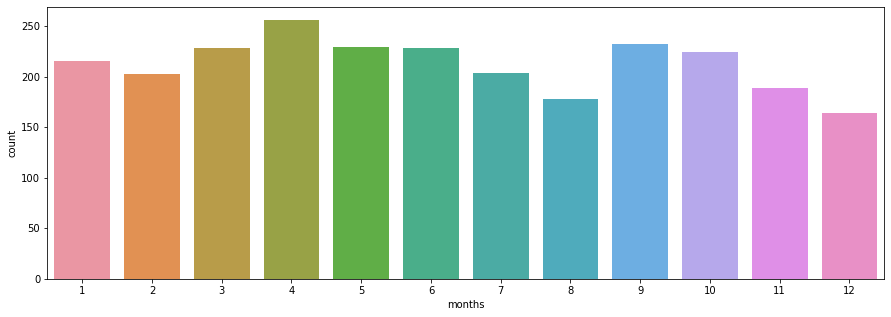

In [1031]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(md['months'])

In [1032]:
#Which year are most popular among TED and TEDx chapters?
md['year'].value_counts()

2012    306
2011    261
2010    257
2013    244
2016    243
2014    240
2009    222
2015    220
2017    197
2008    188
2007    122
2006     50
Name: year, dtype: int64

/home/tweet/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

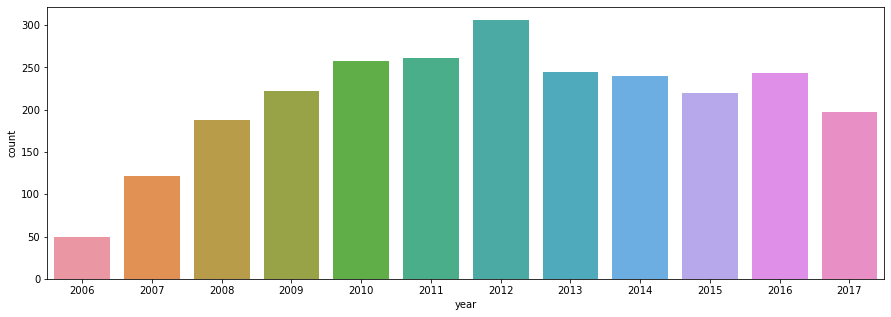

In [1033]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(md['year'])

In [1034]:
md.head(1)

,comments,description,duration,event,languages,main_speaker,name,num_speaker,published_date,ratings,...,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring,rating-count,views-per-comment,months,year
0,4553,sir ken robinson makes an entertaining and pro...,1164,ted2006,60,ken robinson,ken robinson: do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",...,300.0,10704.0,4439.0,1174.0,209.0,24924.0,93850,10372.745443,6,2006


In [1035]:
#Which event is the most popular?
md.groupby('event').views.agg(['count', 'mean', 'sum']).sort_values(by='sum', ascending=False).head()

,count,mean,sum
event,,,
ted2013,77,2.302700e+06,177307937
ted2014,84,2.072874e+06,174121423
tedglobal 2013,66,2.584163e+06,170554736
ted2015,75,2.011017e+06,150826305
ted2006,45,3.274345e+06,147345533


In [1036]:
#which TED Talk has the most rating
columns = ['title', 'rating-count']

In [1037]:
rating_count[columns].head(10)

,title,rating-count
0,do schools kill creativity?,93850
201,my stroke of insight,70665
1346,your body language may shape who you are,65968
837,the power of vulnerability,60078
677,how great leaders inspire action,56779
1030,how to live before you die,38158
1129,the happy secret to better work,32180
1163,the power of introverts,30037
176,underwater astonishments,30011
530,the danger of a single story,29775


In [1039]:
#By unpacking rate, we can fine the funniest or othre kind of rating
columns = ['title', 'funny', "speaker_occupation"]
md[columns].sort_values(by="funny", ascending=False).head()

,title,funny,speaker_occupation
0,do schools kill creativity?,19645.0,author/educator
2114,this is what happens when you reply to spam email,7731.0,comedian and writer
2161,inside the mind of a master procrastinator,7445.0,blogger
1129,the happy secret to better work,7315.0,psychologist
675,"lies, damned lies and statistics (about tedtalks)",5552.0,data scientist
